In [9]:
# 3/3/24 Greenberger-Horne-Zeilinger (GHZ) State 15 qubits
# importing all required libraries
import supermarq
import qiskit
import qiskit_superstaq as qss
import os
import json

In [21]:
# connecting api key from my account to simulate the circuits
api_key = "22f5ffa4443b97a2cfe06ce1b5f3af5c20e7478ca1b37843e2c45b80c9259f43"
provider = qss.SuperstaqProvider(api_key)
# making sure to not run out of balance
print(provider.get_balance())

# setting circuit name to avoid having to change it everytime
name = "ghz"

11.20 credits


In [11]:
# defining which circuit I want to use and how many qubits
qc = supermarq.ghz.GHZ(num_qubits=15)
qc_circuit = qc.qiskit_circuit()

0.999938961118005
{'000000000000000': 520, '111111111111111': 504}


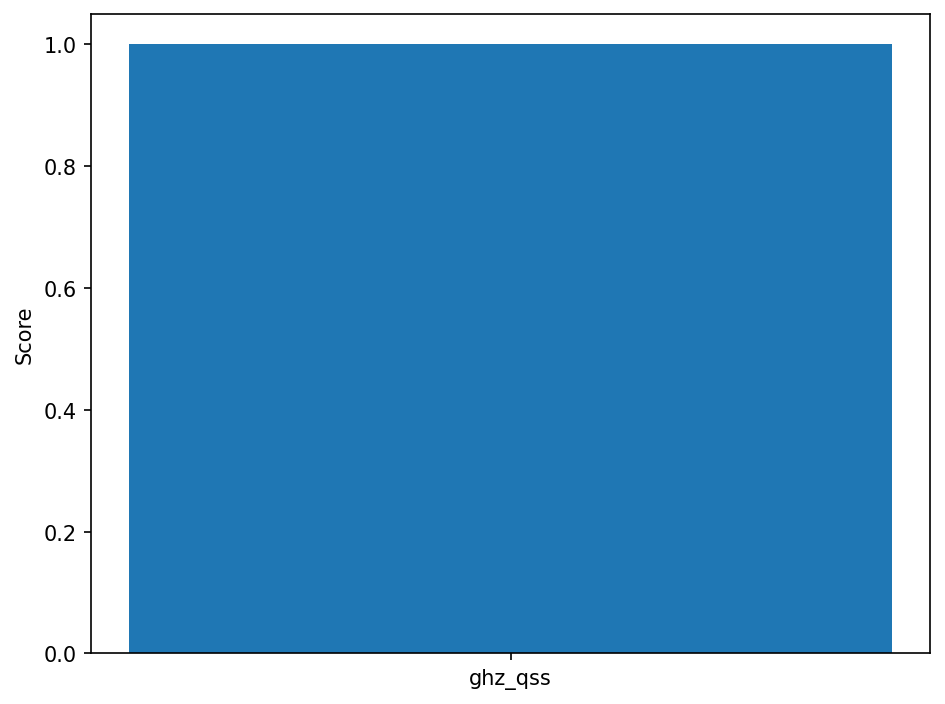

In [20]:
# setting the shot interval
x = 64

# setting up a simple while loop
while x<= 1024:
    
    output = {}
    
    # setting the simulator that we will use to simulate our circuit (the default is ss_unconstrained_simulator)
    backend = provider.get_backend("ibmq_statevector_simulator")
    job_qss = backend.run(qc_circuit, shots=x, method="dry-run")

    # gettng the results of the simulation 
    job = job_qss.result()

    # getting the counts and printing them
    counts = job.get_counts()
    
    # getting accuracy to make sure this is accurate
    score = qc.score(counts)
    
    data = {
        'counts': counts,
        'accuracy': score
    }

    # logging results into a json file
    with open(name + '_counts_' + str(x) + '.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
        
    x += 64

# measuring and getting fidelity of the result       
score = qc.score(counts)
print(score)
print(counts)

# plotting a bar chart of the benchmark results
supermarq.plotting.plot_results([score], [name + "_qss"])
